In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import collections
import altair as alt
import seaborn as sns
import ast
from tqdm import tqdm
from Bio.Seq import Seq
import more_itertools as mit

In [2]:
allCaller = pd.read_csv('/home/mark/Desktop/MEI_Group/HGSVC3/Merged_Callsets/Manuscript/t2tCHM13_hgsvc3_PublicationSet_Final.csv')
allCaller.set_index("ID", inplace=True)

In [3]:
print(len(allCaller))

13216


In [4]:
collections.Counter(allCaller[allCaller['Caller_Count']==2]['TE_Designation'])

Counter({'SINE/Alu': 9948, 'LINE/L1': 1416, 'Retroposon/SVA': 615})

In [5]:
11979/13216

0.9064013317191283

In [6]:
t2t_pDEL_DF = pd.read_csv('/home/mark/Desktop/MEI_Group/HGSVC3/hs1_hgsvc3_deletions_07-11-2024.csv').set_index("ID")
t2t_pDEL_DF

,CHROM,POS,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG00096,HG00171,...,Ancestral_Findings,Tail_Begins,Tail_Type,Element_Annotation,Element_Divergence,Tail_Length,Tail_Seed_Hits,Unique_Element_Count,FILTER_RESULTS,Young_Filter
ID,,,,,,,,,,,,,,,,,,,,,
chr1-91112-DEL-382,chr1,91111,ATACATGGAGGGGAACAACACACACCAGGGCCTCTCAGGGGGACAG...,A,.,.,ID=chr1-91112-DEL-382;VARTYPE=SV;SVTYPE=DEL;SV...,GT,0|0|.,0|0|.,...,No_Hits,No_Tail_Detected,No_Tail_Type,L1P4,19.15,0,0,One_Element,NONE,['Good_LINE_Size']
chr1-92338-DEL-77,chr1,92337,ATACATGGAGGGGAACACCACACACCAGGGCCTCTCAGGGGGACAG...,A,.,.,ID=chr1-92338-DEL-77;VARTYPE=SV;SVTYPE=DEL;SVL...,GT,0|0|.,0|0|.,...,No_Hits,No_Tail_Detected,No_Tail_Type,L1P3,18.10,0,0,One_Element,NONE,['Good_LINE_Size']
chr1-93027-DEL-462,chr1,93026,GTGGATACATGGAGGGGAACAACACACACCAGGGCCTCTCAGGGGG...,G,.,.,ID=chr1-93027-DEL-462;VARTYPE=SV;SVTYPE=DEL;SV...,GT,0|0|.,0|0|.,...,No_Hits,No_Tail_Detected,No_Tail_Type,L1P4,18.90,0,0,One_Element,NONE,['Good_LINE_Size']
chr1-93094-DEL-77,chr1,93093,GGACAAACACGTGGATACATGGAGGGGAACACCACACACCAGGGCC...,G,.,.,ID=chr1-93094-DEL-77;VARTYPE=SV;SVTYPE=DEL;SVL...,GT,0|0|.,0|0|.,...,No_Hits,No_Tail_Detected,No_Tail_Type,L1P4,18.10,0,0,One_Element,NONE,['Good_LINE_Size']
chr1-93788-DEL-153,chr1,93787,GACAAACACGTGGATACATGGAGGGGAACAACACACAACAGGGCCT...,G,.,.,ID=chr1-93788-DEL-153;VARTYPE=SV;SVTYPE=DEL;SV...,GT,0|0|.,0|0|.,...,No_Hits,No_Tail_Detected,No_Tail_Type,L1P4,19.20,0,0,One_Element,NONE,['Good_LINE_Size']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY-1785884-DEL-136,chrY,1785883,CAAAAATTAGCCTGGGCATGGTGGCTTACGCCTGTCATCCCAGCAC...,C,.,.,ID=chrY-1785884-DEL-136;VARTYPE=SV;SVTYPE=DEL;...,GT,1|1|.,.|.|.,...,No_Hits,3,Possible_A-Tail,AluSq10,6.40,5,2,One_Element,['Alu_Linker_Region_Warning'],['Good_ALU_Size']
chrY-2697711-DEL-87,chrY,2697710,GCAGTGGCTCATGCCTGTATCCCAGCACTTTGGGAGGCCAAGGAGG...,G,.,.,ID=chrY-2697711-DEL-87;VARTYPE=SV;SVTYPE=DEL;S...,GT,0|.|.,.|.|.,...,No_Hits,No_Tail_Detected,No_Tail_Type,AluYk12,7.10,0,0,One_Element,NONE,"['Younger_ALU_SUBFAMILY', 'Good_ALU_Size']"
chrY-2729347-DEL-97,chrY,2729346,TTTTCAGTATGATTGCTACCAATTCTGCTTTGAATATCTGATAGAA...,T,.,.,ID=chrY-2729347-DEL-97;VARTYPE=SV;SVTYPE=DEL;S...,GT,0|.|.,.|.|.,...,No_Hits,91,Possible_T-Tail,L1PB,16.00,6,2,One_Element,['Bad_Tail_Position'],['Good_LINE_Size']


In [7]:
sampleOrder=['HG02587',
             'HG02666',
             'HG02769',
             'HG02818',
             'HG02953',
             'HG03065',
             'HG03248',
             'HG03371',
             'HG03452',
             'HG03456',
             'HG03520',
             'NA19036',
             'NA19129',
             'NA19238',
             'NA19239',
             'NA19240',
             'NA19317',
             'NA19331',
             'NA19347',
             'NA19384',
             'NA19434',
             'NA21487',
             'HG01890',
             'HG02011',
             'HG02282',
             'HG02554',
             'NA19705',
             'NA19836',
             'NA19983',
             'NA20355',
             'HG00731',
             'HG00732',
             'HG00733',
             'HG01114',
             'HG01352',
             'HG01457',
             'HG01573',
             'HG02106',
             'NA19650',
             'HG00512',
             'HG00513',
             'HG00514',
             'HG00864',
             'HG01596',
             'HG02018',
             'HG02059',
             'NA18534',
             'NA18939',
             'NA18989',
             'HG00096',
             'HG00171',
             'HG00268',
             'HG00358',
             'HG01505',
             'NA12329',
             'NA20509',
             'NA24385',
             'HG02492',
             'HG03009',
             'HG03683',
             'HG03732',
             'HG03807',
             'HG04036',
             'HG04217',
             'NA20847' 
            ]
sampleList={x:{'SINE/Alu':0,'LINE/L1':0, 'Retroposon/SVA':0, 'HERVK':0, 'snRNA':0, 'REF_SINE/Alu':0,'REF_LINE/L1':0, 'REF_Retroposon/SVA':0, 'REF_HERVK':0, 'REF_snRNA':0, 'DEL_SINE/Alu':0,'DEL_LINE/L1':0, 'DEL_Retroposon/SVA':0, 'DEL_HERVK':0, 'DEL_snRNA':0,} for x in sampleOrder}

In [8]:
hg38RefINS = pd.read_csv('/home/mark/Desktop/MEI_Group/HGSVC3/DELETIONS_HGSVC3/t2t_REF_INS_07-10-2024.csv').set_index("ID")

In [9]:
for row in allCaller.index:
    elementType=str(allCaller.at[row,'TE_Designation'])
    for sample in sampleOrder:
        #total = len([x for x in allCaller.at[row,sample].split("|")[:2] if str(x) == '1'])
        if '1' in str(allCaller.at[row,sample]):
            total=1
            sampleList[sample][elementType]+=total
        else:
            continue

In [10]:
for row in hg38RefINS.index:
    elementType=str(hg38RefINS.at[row,'TE_Designation'])
    for sample in sampleOrder:
        #total = len([x for x in hg38RefINS.at[row,sample].split("|")[:2] if str(x) == '0'])
        if '1' in str(hg38RefINS.at[row,sample]):
            total=1
            sampleList[sample]["REF_"+str(elementType)]+=total
        else:
            continue

In [11]:
for row in t2t_pDEL_DF.index:
    elementType=str(t2t_pDEL_DF.at[row,'TE_Designation'])
    for sample in sampleOrder:
        #total = len([x for x in hg38_pDEL_DF.at[row,sample].split("|")[:2] if str(x) == '1'])
        if '1' in str(t2t_pDEL_DF.at[row,sample]):
            total=1
            sampleList[sample]["DEL_"+str(elementType)]+=total
        else:
            continue

In [12]:
columns=['SINE/Alu','LINE/L1','Retroposon/SVA','REF_SINE/Alu','REF_LINE/L1','REF_Retroposon/SVA', 'DEL_SINE/Alu','DEL_LINE/L1','DEL_Retroposon/SVA']
sampleDF = pd.DataFrame(index=sampleOrder, columns=['SINE/Alu','LINE/L1','Retroposon/SVA','REF_SINE/Alu','REF_LINE/L1','REF_Retroposon/SVA','DEL_SINE/Alu','DEL_LINE/L1','DEL_Retroposon/SVA'])
sampleList2 = []
for sample in sampleList.keys():
    for element in sampleList[sample]:
        sampleDF.at[sample, element] = int(sampleList[sample][element])
        sampleList2.append([sample, element,int(sampleList[sample][element])])
sampleDF2 =pd.DataFrame(data=sampleList2, columns=['Sample','Data-Element','Count'])

In [13]:
columns=['SINE/Alu','LINE/L1','Retroposon/SVA','REF_SINE/Alu','REF_LINE/L1','REF_Retroposon/SVA']
sampleDF = pd.DataFrame(index=sampleOrder, columns=['SINE/Alu','LINE/L1','Retroposon/SVA','REF_SINE/Alu','REF_LINE/L1','REF_Retroposon/SVA'])
sampleList2 = []
for sample in sampleList.keys():
    for element in sampleList[sample]:
        sampleDF.at[sample, element] = int(sampleList[sample][element])
        sampleList2.append([sample, element,int(sampleList[sample][element])])
sampleDF2 =pd.DataFrame(data=sampleList2, columns=['Sample','Data-Element','Count'])

In [14]:
sampleDF2

,Sample,Data-Element,Count
0,HG02587,SINE/Alu,1671
1,HG02587,LINE/L1,224
2,HG02587,Retroposon/SVA,93
3,HG02587,HERVK,0
4,HG02587,snRNA,0
...,...,...,...
970,NA20847,DEL_SINE/Alu,140
971,NA20847,DEL_LINE/L1,157
972,NA20847,DEL_Retroposon/SVA,315
973,NA20847,DEL_HERVK,0


In [15]:
samplePivot = sampleDF2.pivot(index="Sample", columns="Data-Element", values="Count").copy()

In [16]:
PopColors={'AFR':'orange', 'AMR':'red', 'EAS':'limegreen', 'EUR':'cyan', 'SAS':'pink'}
metaDataDF = pd.read_csv('/home/mark/Desktop/HLA/Globus/hgsvc_samples.tsv', sep='\t').set_index("sample")
populationColors={'ACB':'#FF9900',
 'ASW':'#FF6600',
 'ASK':'#1374DA',
 'BEB':'#8A008A',
 'CDX':'#339900',
 'CEU':'#0000FF',
 'CHB':'#ACCD00',
 'CHS':'#00FF00',
 'CLM':'#CC3333',
 'ESN':'#FFCD00',
 'FIN':'#00C5CD',
 'GBR':'#00EBFF',
 'GIH':'#9300D2',
 'GWD':'#FFB800',
 'IBS':'#6394EC',
 'ITU':'#AF2F5F',
 'JPT':'#008A00',
 'KHV':'#00CC33',
 'LWK':'#CC9933',
 'MKK':'#EEB718',
 'MSL':'#E0B818',
 'MXL':'#E00033',
 'PEL':'#FF0000',
 'PJL':'#E01288',
 'PUR':'#CC3300',
 'STU':'#FF00FF',
 'TSI':'#00008A',
 'YRI':'#FFB833'}

In [17]:
metaDataDF

,order_num,hgsvc_phase,family,member,population,supergroup,sex
sample,,,,,,,
NA19238,1,Yr1,Y117,Mother,YRI,AFR,Female
NA19239,2,Yr1,Y117,Father,YRI,AFR,Male
NA19240,3,Yr1,Y117,Daughter,YRI,AFR,Female
HG00731,4,Yr1,PR05,Father,PUR,AMR,Male
HG00732,5,Yr1,PR05,Mother,PUR,AMR,Female
...,...,...,...,...,...,...,...
NA19384,65,Yr2,NA19384,-,LWK,AFR,Male
HG01890,66,Yr3,BB05,Father,ACB,AFR,Male
NA19705,67,Yr3,2368,Son,ASW,AFR,Male


In [18]:
sampleDF2

,Sample,Data-Element,Count
0,HG02587,SINE/Alu,1671
1,HG02587,LINE/L1,224
2,HG02587,Retroposon/SVA,93
3,HG02587,HERVK,0
4,HG02587,snRNA,0
...,...,...,...
970,NA20847,DEL_SINE/Alu,140
971,NA20847,DEL_LINE/L1,157
972,NA20847,DEL_Retroposon/SVA,315
973,NA20847,DEL_HERVK,0


In [19]:
sampleDF2['Superpopulation']='TEMP'
for row in sampleDF2.index:
    sampleDF2.at[row,'Superpopulation']=metaDataDF.at[sampleDF2.at[row,'Sample'],'supergroup']

In [20]:
otherPaperdata =pd.read_csv('/home/mark/Desktop/MEI_Group/HGSVC3/Tobias1000genomes_paperComparison.csv')

In [25]:
otherPaperdata[otherPaperdata['ANNOTATION'].isin(['Alu','SVA','L1'])]

,ANNOTATION,SVTYPE,AFR,AMR,EAS,EUR,SAS,NON_AFR
10,Alu,DEL,"1,068",867,864,845,874,862
11,Alu,INS,"1,410","1,017","1,004",991,"1,010","1,004"
12,SVA,DEL,36,31,31,32,32,31
13,SVA,INS,78,56,60,53,57,56
14,L1,DEL,117,100,101,99,102,100
15,L1,INS,170,130,131,125,128,129


In [22]:
         AFR     AMR    EAS     EUR  SAS   NON_AFR
Alu	INS	1,410	1,017	1,004	991	1,010	1,004
L1	INS	170	130	131	125	128	129
SVA	INS	78	56	60	53	57	56

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1226427296.py, line 2)

In [26]:
afrsampes = sampleDF2[sampleDF2['Superpopulation']=='AFR'].copy()
nonafrsampes = sampleDF2[sampleDF2['Superpopulation']!='AFR'].copy()

In [27]:
afrtotal = []
for sample in set(afrsampes['Sample']):
    testDF = afrsampes[afrsampes['Sample']==sample].copy()
    goodRows=['SINE/Alu','LINE/L1','Retroposon/SVA','HERVK','snRNA']
    testDF2 = testDF[testDF['Data-Element'].isin(goodRows)].copy()
    afrtotal.append(int(sum(testDF2['Count'])))

In [28]:
nonafrtotal = []
for sample in set(nonafrsampes['Sample']):
    testDF = nonafrsampes[nonafrsampes['Sample']==sample].copy()
    goodRows=['SINE/Alu','LINE/L1','Retroposon/SVA','HERVK','snRNA']
    testDF2 = testDF[testDF['Data-Element'].isin(goodRows)].copy()
    nonafrtotal.append(int(sum(testDF2['Count'])))

In [29]:
np.mean(afrtotal)

1968.2333333333333

In [30]:
from scipy import stats
res = stats.levene(afrtotal, nonafrtotal)
res.statistic

2.0859215734222065

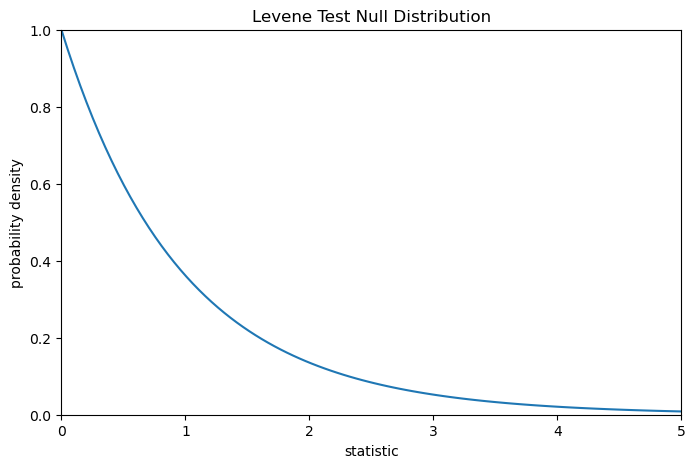

In [84]:
import matplotlib.pyplot as plt
k, n = 3, 60   # number of samples, total number of observations
dist = stats.f(dfn=k-1, dfd=n-k)
val = np.linspace(0, 5, 100)
pdf = dist.pdf(val)
fig, ax = plt.subplots(figsize=(8, 5))
def plot(ax):  # we'll reuse this
    ax.plot(val, pdf, color='C0')
    ax.set_title("Levene Test Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
plot(ax)
plt.show()

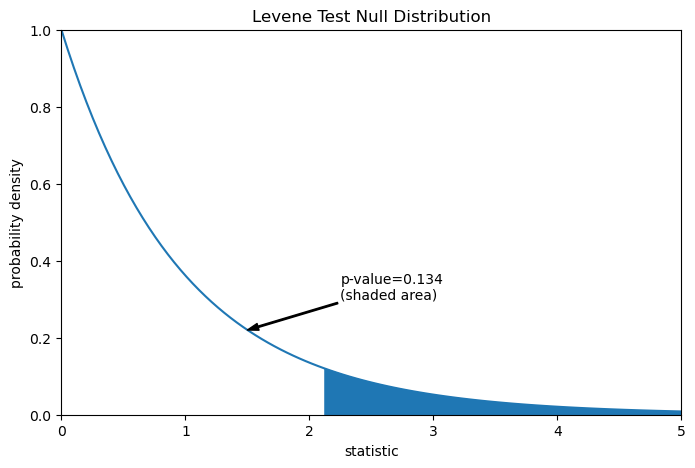

In [85]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
pvalue = dist.sf(res.statistic)
annotation = (f'p-value={pvalue:.3f}\n(shaded area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (1.5, 0.22), (2.25, 0.3), arrowprops=props)
i = val >= res.statistic
ax.fill_between(val[i], y1=0, y2=pdf[i], color='C0')
plt.show()

In [47]:
from scipy import stats
res = stats.shapiro(afrtotal)
res.statistic

0.9785931706428528

(array([3., 0., 1., 2., 3., 1., 1., 2., 2., 4., 2., 3., 2., 1., 0., 2., 0.,
        0., 0., 1.]),
 array([1884. , 1894.1, 1904.2, 1914.3, 1924.4, 1934.5, 1944.6, 1954.7,
        1964.8, 1974.9, 1985. , 1995.1, 2005.2, 2015.3, 2025.4, 2035.5,
        2045.6, 2055.7, 2065.8, 2075.9, 2086. ]),
 <BarContainer object of 20 artists>)

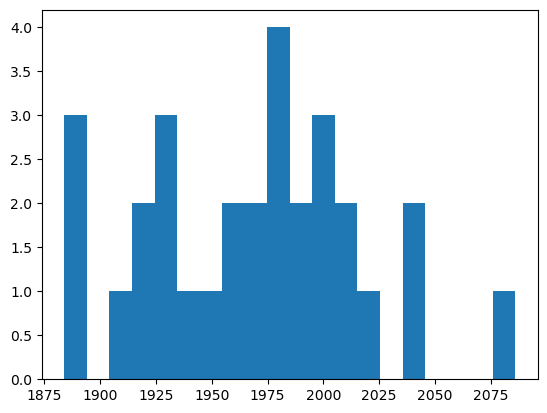

In [44]:
plt.hist(afrtotal, bins=20)

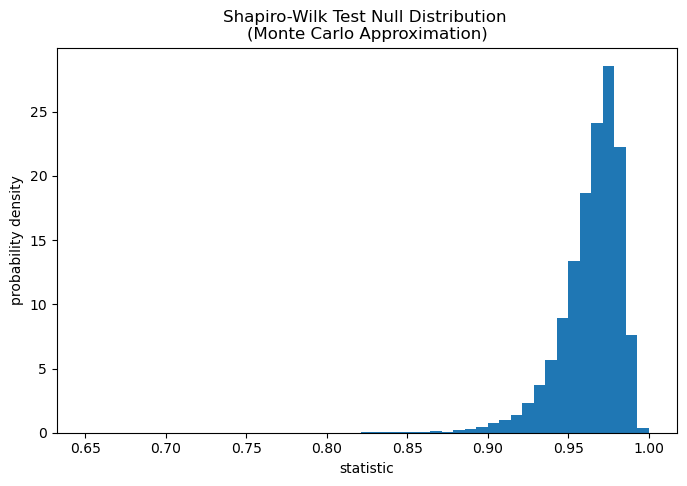

In [52]:
def statistic(x):
    # Get only the `shapiro` statistic; ignore its p-value
    return stats.shapiro(x).statistic
ref = stats.monte_carlo_test(afrtotal, stats.norm.rvs, statistic,
                             alternative='less')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 5))
bins = np.linspace(0.65, 1, 50)
def plot(ax):  # we'll reuse this
    ax.hist(ref.null_distribution, density=True, bins=bins)
    ax.set_title("Shapiro-Wilk Test Null Distribution \n"
                 "(Monte Carlo Approximation)")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

0.7362326383590698

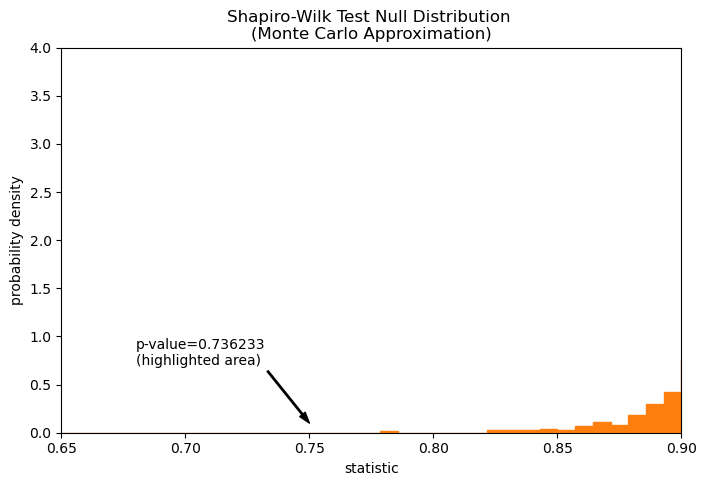

In [53]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
annotation = (f'p-value={res.pvalue:.6f}\n(highlighted area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (0.75, 0.1), (0.68, 0.7), arrowprops=props)
i_extreme = np.where(bins <= res.statistic)[0]
for i in i_extreme:
    ax.patches[i].set_color('C1')
plt.xlim(0.65, 0.9)
plt.ylim(0, 4)
plt.show
res.pvalue

In [41]:
np.mean(nonafrtotal)

1423.2285714285715

In [48]:
res = stats.shapiro(nonafrtotal)
res.statistic

0.9792994260787964

(array([1., 0., 1., 0., 2., 1., 1., 1., 2., 4., 3., 6., 4., 2., 0., 4., 1.,
        0., 0., 2.]),
 array([1328.  , 1336.75, 1345.5 , 1354.25, 1363.  , 1371.75, 1380.5 ,
        1389.25, 1398.  , 1406.75, 1415.5 , 1424.25, 1433.  , 1441.75,
        1450.5 , 1459.25, 1468.  , 1476.75, 1485.5 , 1494.25, 1503.  ]),
 <BarContainer object of 20 artists>)

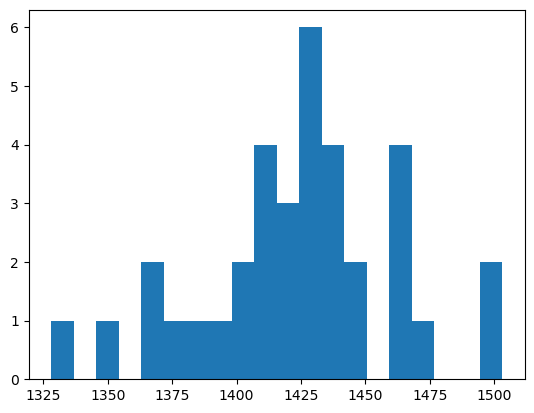

In [45]:
plt.hist(nonafrtotal, bins=20)

In [28]:
import scipy.stats

def f_test(x, y):
    """
    F-test of equal standard deviations.

    Using code from:
    https://www.statology.org/f-test-python/

    :param x: List of values for set 1.
    :param y: List of values for set 2.
    """

    f = np.var(x, ddof=1)/np.var(y, ddof=1)
    p = 1 - scipy.stats.f.cdf(f, len(x) - 1, len(y) - 1)

    return f, p

In [29]:
f_test(afrtotal,nonafrtotal)

(1.5636030464693442, 0.10524672245563171)

In [26]:
import numpy as np
from scipy import stats
stats.ttest_ind(afrtotal, nonafrtotal, equal_var=True)

TtestResult(statistic=49.79708834500945, pvalue=2.618102497893203e-52, df=63.0)

In [27]:
stats.ttest_ind(afrtotal, nonafrtotal, equal_var=False)

TtestResult(statistic=48.94858149853176, pvalue=3.0611171004489043e-47, df=55.3280242167739)

In [31]:
for population in set(sampleDF2['Superpopulation']):
    tempDF = sampleDF2[sampleDF2['Superpopulation']==population].copy()
    for element in set(['LINE/L1','SINE/Alu','Retroposon/SVA']):
        tempDF2 = tempDF[tempDF['Data-Element']==element].copy()
        countList = [int(x) for x in tempDF2['Count']]
        print(population, element, int(np.median(countList)))
        #print(population, element, int(np.mean(countList)))

    print('\n')
        

AMR SINE/Alu 1162
AMR LINE/L1 168
AMR Retroposon/SVA 72


AFR SINE/Alu 1644
AFR LINE/L1 224
AFR Retroposon/SVA 100


EAS SINE/Alu 1172
EAS LINE/L1 180
EAS Retroposon/SVA 80


SAS SINE/Alu 1215
SAS LINE/L1 180
SAS Retroposon/SVA 77


EUR SINE/Alu 1166
EUR LINE/L1 160
EUR Retroposon/SVA 67




In [24]:
#Alus
print('AFR', 1644/1410)
print('AMR', 1162/1017)
print('EAS', 1172/1004)
print('EUR', 1166/991)
print('SAS', 1215/1010)

AFR 1.1659574468085105
AMR 1.1425762045231072
EAS 1.1673306772908367
EUR 1.1765893037336024
SAS 1.202970297029703


In [35]:
16.60+14.26+16.73+17.66+20.30

85.55

In [36]:
85.55/5

17.11

In [25]:
#L1s
print('AFR', 224/170)
print('AMR', 168/130)
print('EAS', 180/131)
print('EUR', 160/125)
print('SAS', 180/128)

AFR 1.3176470588235294
AMR 1.2923076923076924
EAS 1.3740458015267176
EUR 1.28
SAS 1.40625


In [33]:
31.76+29.23+37.40+28+40.06

166.45

In [34]:
166.45/5

33.29

In [26]:
#SVAs
print('AFR', 100/78)
print('AMR', 72/56)
print('EAS', 80/60)
print('EUR', 67/53)
print('SAS', 77/57)

AFR 1.2820512820512822
AMR 1.2857142857142858
EAS 1.3333333333333333
EUR 1.2641509433962264
SAS 1.3508771929824561


In [30]:
28.21+28.57+33.33+26.42+35.10

151.63

In [32]:
151.63/5

30.326

In [ ]:
Comparing our MEI insertions calls to a recent study analyzing variants within a larger cohort of 1000 genomes project samples [PMID: 38659906] we find 44.73% more Alus, 62.12% more L1s, and 58.29% more SVAs on average per population. In addition to capturing a greater total of MEIs, using our high-quality haplotype-resolved assemblies we have the ability to investigate MEIs in complex regions of the genome, such as centromeres, that have historically been excluded.

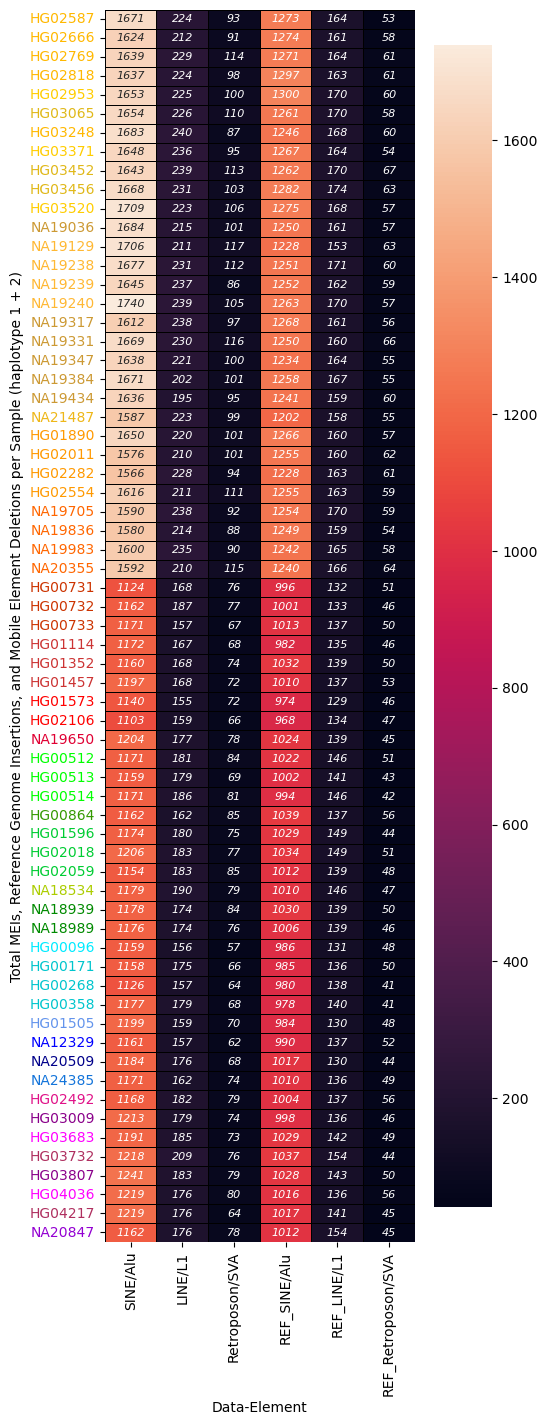

In [21]:
import matplotlib.pyplot as plt
colors = []
for x in sampleOrder:
    colors.append(populationColors[metaDataDF.at[x,'population']])

fig, ax = plt.subplots(figsize=(5,16))  
ax=sns.heatmap(samplePivot[columns].loc[sampleOrder], annot=True, linewidth=.5, fmt='g', linecolor='black',annot_kws={'fontsize': 8, 'fontstyle': 'italic'})
for ticklabel, tickcolor in zip(ax.get_yticklabels(), colors):
    ticklabel.set_color(tickcolor)
ax.set(ylabel='Total MEIs, Reference Genome Insertions, and Mobile Element Deletions per Sample (haplotype 1 + 2)')
#plt.savefig('/home/mark/Desktop/MEI_Group/HGSVC3/Figures/MEIs/t2t_MEI_INS_Overall.pdf', dpi=500, bbox_inches='tight')
plt.savefig('/home/mark/Desktop/MEI_Group/HGSVC3/Figures/MEIs/t2t_MEI_INS_Overall.svg', dpi=500, bbox_inches='tight')
#plt.savefig('/home/mark/Desktop/MEI_Group/HGSVC3/Figures/MEIs/t2t_MEI_INS_Overall.jpg', dpi=500, bbox_inches='tight')